<a href="https://colab.research.google.com/github/hannahbanjo/AssociationOfDataScience/blob/main/ai_agent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Build-An-Agent**

*In* this notebook, we'll walk through the process of building an AI agent that can generate images from a text prompt using a pre-trained Stable Diffusion model. Then, the agent will analyze the generated image using a pre-trained object detection model. This activity will allow us to see how an AI agent can seamlessly integrate multiple machine learning pipelines, from image generation to object detection, to create a powerful tool for visual content creation and analysis.



## Creating the image

Let's begin by importing the libraries we need. We'll use diffusers for image generation, torch for GPU support, PIL for image manipulation, and transformers for object detection.

In [ ]:
from diffusers import StableDiffusionPipeline
import torch
import matplotlib.pyplot as plt
from PIL import Image

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

Here we generate an image based on the prompt we provide and save it to the file generated_image.jpg

Note: You may have to change the runtime type if you encounter a run time error. Go to runtime --> change runtime type --> T4 GPU

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/543 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/613 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/346 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/807 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/911 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/553 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

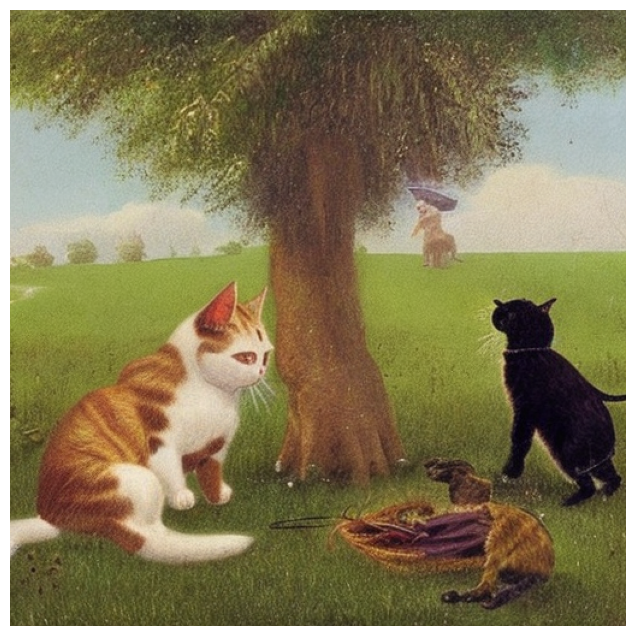

In [ ]:
# Load pre-trained model (Stable Diffusion)
pipe = StableDiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-2-1-base", torch_dtype=torch.float32)

# Move the pipeline to GPU (if available)
pipe = pipe.to("cuda")

# Generate image based on text prompt
prompt = "A meadow with a dog and cat"
image = pipe(prompt).images[0]

# Save the generated image to a file
image.save("/content/generated_image.jpg")

# Display the generated image
plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.axis("off")  # Turn off axis
plt.show()

# Object Detection

Next, we will import the necessary libraries for performing object detection on the generated image. We'll use the transformers library to load a pre-trained object detection model.

In [ ]:
from transformers import pipeline
from PIL import Image, ImageDraw

Next, we perform object detection, output the identified objects, and display their respective locations within the image.

In [ ]:
from transformers import pipeline
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

# Load pre-trained object detection model
image_analyzer = pipeline("object-detection")

# Load the image (use your generated image)
image = Image.open("/content/generated_image.jpg")

# Analyze the image for object detection (with adjusted threshold)
result = image_analyzer(image, threshold=0.3)  # Adjust threshold to your preference

# Print the result to inspect the structure
print(result)

No model was supplied, defaulted to facebook/detr-resnet-50 and revision 1d5f47b (https://huggingface.co/facebook/detr-resnet-50).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/4.59k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


preprocessor_config.json:   0%|          | 0.00/290 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.48, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use cuda:0


[{'score': 0.9973676800727844, 'label': 'cat', 'box': {'xmin': 399, 'ymin': 236, 'xmax': 511, 'ymax': 414}}, {'score': 0.5174556374549866, 'label': 'cat', 'box': {'xmin': 351, 'ymin': 405, 'xmax': 454, 'ymax': 497}}, {'score': 0.9927871823310852, 'label': 'cat', 'box': {'xmin': 0, 'ymin': 221, 'xmax': 223, 'ymax': 471}}]


To make the object detection process clearer, let's add bounding boxes around the detected objects, allowing us to visualize their locations more easily.

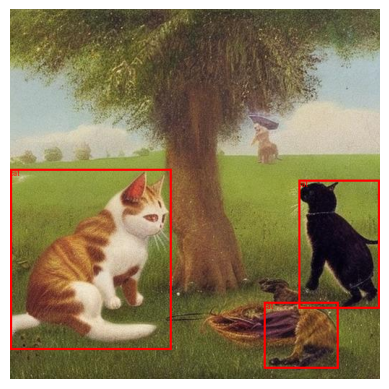

In [ ]:
# Visualize detected objects
draw = ImageDraw.Draw(image)

# Iterate over each detection result in the returned list
for detection in result:
    score = detection["score"]
    label = detection["label"]
    box = detection["box"]  # This should be in the format {'xmin': value, 'ymin': value, 'xmax': value, 'ymax': value}

    # Extract the bounding box coordinates from the dictionary
    left = int(box['xmin'])
    top = int(box['ymin'])
    right = int(box['xmax'])
    bottom = int(box['ymax'])

    # Draw the bounding box if the score is above the threshold
    if score > 0.5:  # You can adjust the confidence threshold
        draw.rectangle([left, top, right, bottom], outline="red", width=3)
        draw.text((left, top), str(label), fill="red")

# Display the image with bounding boxes
plt.imshow(image)
plt.axis("off")
plt.show()

Experiment with different confidence thresholds to see how it affects which objects are detected.


In [ ]:
# add your code here

Create your own prompt! How well does the object detection do with more/less objects in the image?

In [ ]:
# add your code here